# Supervised Model
It is desired to predict whether a woman will participate in the Peruvian labor market based on certain characteristics such as age, level of schooling, marital status, number of children, health status, and geographic region of residence.

Note: The base contains variables squared for age and education corresponding to their characteristic diminishing marginal return.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# necessary libraries

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
# reading data and deep copy of relevant variables

df_sqrd = pd.read_csv('../dataGitHub/Participacion laboral femenina.csv', encoding='latin-1')
df_sqrd = df_sqrd[['participa', 'edad', 'edad2', 'escolaridad', 'escolaridad2', 'convcas', 'nninos', 'enfermedad', 'costa', 'sierra', 'selva']].copy()
df_sqrd.columns = ['participates', 'age', 'age_sqrd', 'education', 'education_sqrd', 'married', 'children', 'illness', 'coast', 'mountains', 'jungle' ]
df_sqrd

,participates,age,age_sqrd,education,education_sqrd,married,children,illness,coast,mountains,jungle
0,1.0,50,2500,6.0,36.0,0,0,1.0,0,1,0
1,1.0,27,729,11.0,121.0,0,0,1.0,0,1,0
2,0.0,65,4225,2.0,4.0,0,0,1.0,0,1,0
3,1.0,34,1156,11.0,121.0,0,0,1.0,0,1,0
4,0.0,22,484,14.0,196.0,0,0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
27116,1.0,29,841,14.0,196.0,0,0,1.0,1,0,0
27117,1.0,27,729,16.0,256.0,1,1,0.0,1,0,0
27118,1.0,28,784,14.0,196.0,0,1,0.0,1,0,0
27119,0.0,33,1089,14.0,196.0,1,2,0.0,1,0,0


In [6]:
df_sqrd = df_sqrd.dropna()        # dropping missing values 
df_sqrd = df_sqrd.astype('int')
df_sqrd

,participates,age,age_sqrd,education,education_sqrd,married,children,illness,coast,mountains,jungle
0,1,50,2500,6,36,0,0,1,0,1,0
1,1,27,729,11,121,0,0,1,0,1,0
2,0,65,4225,2,4,0,0,1,0,1,0
3,1,34,1156,11,121,0,0,1,0,1,0
4,0,22,484,14,196,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
27116,1,29,841,14,196,0,0,1,1,0,0
27117,1,27,729,16,256,1,1,0,1,0,0
27118,1,28,784,14,196,0,1,0,1,0,0
27119,0,33,1089,14,196,1,2,0,1,0,0


### Splitting data into train and test

In [7]:
X = df_sqrd.drop('participates', axis=1)
y = df_sqrd['participates']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
        # stratify=y : mantiene la proporción de los datos población en las particiones train y test

--- 
# Predicting Model

## Decision Tree Classifier

In [12]:
classifier_DTC = DecisionTreeClassifier (criterion="entropy", max_depth = 10, random_state = 0)
classifier_DTC.fit(X_train, y_train)

y_prob_DTC = classifier_DTC.predict_proba(X_test)[:, 1]    # [:, 1] second column is the probability of success

print("AUC:", metrics.roc_auc_score(y_test, y_prob_DTC))

AUC: 0.721560865328396


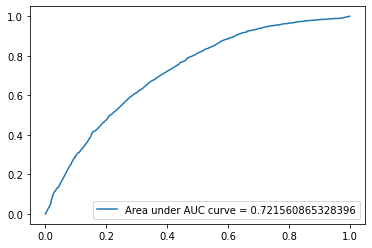

In [13]:
# AUC-ROC Curve: area under the ROC curve

fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_prob_DTC)      # fpr: false positive rate, tpr: true positive rate
auc = metrics.roc_auc_score(y_test, y_prob_DTC)

plt.plot(fpr2, tpr2, label="Area under AUC curve = " + str(auc))
plt.legend(loc=4)
plt.show()


### Analysis
The predictive Decision Tree Classifier model has an AUC-ROC of 0.7215. This means that after evaluating the predicted values with the true ones and plotting the ROC curve, that value has been obtained. To know if it is good or bad, we must compare it with other models that are evaluated in my repository.